In [103]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [104]:
print(len(train_data))

8982


### one-hot编码

In [105]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[10])

[0. 1. 0. ... 0. 0. 0.]


In [106]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_test_labels[10])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 构建model

In [107]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='elu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(46, activation='softmax'))

In [108]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
x_val = x_train[:1000]
x_train_partial = x_train[1000:]

y_val = one_hot_train_labels[:1000]
y_train_partial = one_hot_train_labels[1000:]

In [110]:
history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 51ms/step - loss: 1.8827 - accuracy: 0.6057 - val_loss: 1.2418 - val_accuracy: 0.7250
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 0.9455 - accuracy: 0.8023 - val_loss: 0.9995 - val_accuracy: 0.7960
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6344 - accuracy: 0.8688 - val_loss: 0.8857 - val_accuracy: 0.8160
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4239 - accuracy: 0.9105 - val_loss: 0.8767 - val_accuracy: 0.8160
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.3127 - accuracy: 0.9312 - val_loss: 0.8885 - val_accuracy: 0.8210
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.2391 - accuracy: 0.9449 - val_loss: 0.8778 - val_accuracy: 0.8190
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1982 - accuracy: 0.9493 - val_loss: 0.9174 - val_accuracy: 0.8240
Epoch 8/20
16

### 　绘制训练损失和验证损失

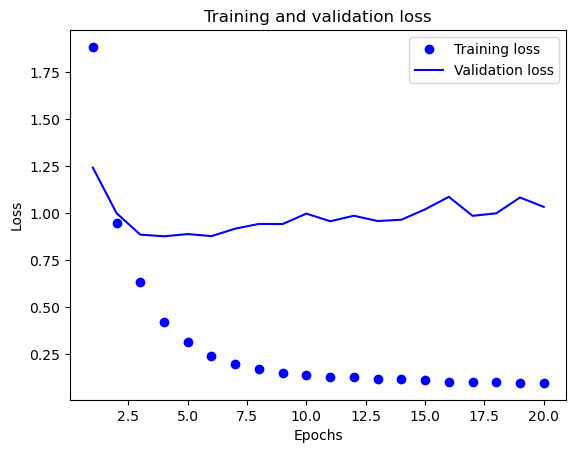

In [111]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

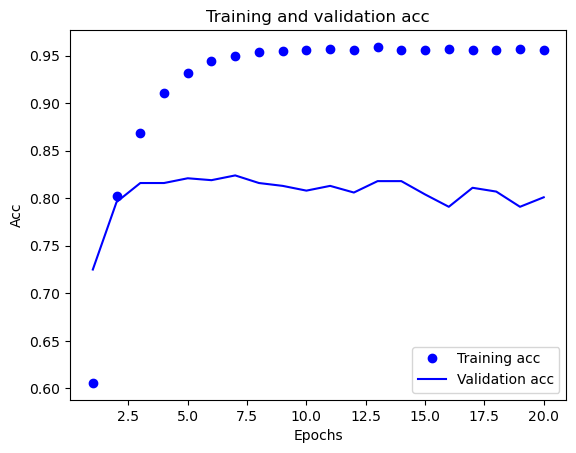

In [112]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()

plt.show()

In [113]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 10ms/step - loss: 1.2211 - accuracy: 0.7898


In [114]:
results

[1.2211408615112305, 0.7898486256599426]

In [115]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [116]:
predictions[0]

array([2.7215056e-05, 1.6071055e-05, 7.6186154e-07, 9.6275473e-01,
       2.9429976e-02, 7.2113018e-09, 6.1462369e-10, 2.6139373e-06,
       2.9104974e-03, 1.2785991e-06, 4.3933387e-06, 5.2783359e-04,
       8.3290815e-06, 8.5824802e-05, 3.3994627e-07, 4.2004946e-09,
       1.3738681e-04, 7.4691457e-06, 7.0224741e-07, 1.7634332e-03,
       2.0986772e-03, 4.0192910e-05, 1.9828946e-07, 7.8092398e-06,
       1.6341285e-07, 5.6749914e-06, 9.8761959e-09, 1.3288260e-07,
       4.7120789e-06, 8.9040992e-07, 5.2984866e-05, 5.1271471e-08,
       5.9507016e-05, 3.3743763e-08, 8.9452051e-06, 1.3147357e-07,
       3.5740781e-05, 2.5677589e-06, 1.6495214e-07, 9.3760846e-08,
       1.0740590e-06, 7.2797241e-07, 9.7023509e-09, 1.4962693e-07,
       8.7578189e-10, 5.3509825e-07], dtype=float32)

In [117]:
np.argmax(predictions[0])

3